## Import Libraries

In [25]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation


import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys


from termcolor import colored

In [26]:
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

In [97]:
df =  pd.read_excel(r"Consumer Data set - Baby.xlsx")

### Exploratory Data Analysis (EDA)

## Head and Trail

In [98]:
df.head()

,Need State,Category,Sub Category,Segment,Sub Segment,Manufacturer New,Actual_Month,$,Units
0,BABY CARE,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2016-11-01,890597.6,170520.0
1,BABY CARE,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2016-12-01,4933059.2,993499.2
2,BABY CARE,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-01-01,3648185.6,687198.4
3,BABY CARE,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-02-01,3629591.2,659757.6
4,BABY CARE,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-03-01,4751350.4,890494.4


In [99]:
df.tail()

,Need State,Category,Sub Category,Segment,Sub Segment,Manufacturer New,Actual_Month,$,Units
1986,BABY CARE,BABY WIPES,BABY WIPES,BABY WIPES,HAND & FACE WIPES,JPC,2019-06-01,1243797.6,333899.2
1987,BABY CARE,BABY WIPES,BABY WIPES,BABY WIPES,HAND & FACE WIPES,JPC,2019-07-01,924490.4,249528.0
1988,BABY CARE,BABY WIPES,BABY WIPES,BABY WIPES,HAND & FACE WIPES,JPC,2019-08-01,919956.8,250286.4
1989,BABY CARE,BABY WIPES,BABY WIPES,BABY WIPES,HAND & FACE WIPES,JPC,2019-09-01,1185224.8,333712.0
1990,BABY CARE,BABY WIPES,BABY WIPES,BABY WIPES,HAND & FACE WIPES,JPC,2019-10-01,801342.4,221572.0


## Shape

In [100]:
print("Total no. of rows: ", df.shape[0])
print("Total no. of Columns: ", df.shape[1])

Total no. of rows:  1991
Total no. of Columns:  9


## info

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Need State        1991 non-null   object        
 1   Category          1991 non-null   object        
 2   Sub Category      1991 non-null   object        
 3   Segment           1991 non-null   object        
 4   Sub Segment       1991 non-null   object        
 5   Manufacturer New  1991 non-null   object        
 6   Actual_Month      1991 non-null   datetime64[ns]
 7   $                 1991 non-null   float64       
 8   Units             1991 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 140.1+ KB


**Observation 1**

**1.** Total 7 objects and 2 Int columns

**2.** no null values can be seen

**3.** Need State column is of no use thus we will drop this column

## Summary

In [102]:
df.describe().T.style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
$,1991.000000,4352434.172577,9473732.973425,0.000000,163507.200000,942898.400000,4180587.600000,64624522.400000
Units,1991.000000,982036.785535,2317121.216835,0.000000,31490.800000,241471.200000,984494.800000,16254585.600000


**Observation 2:**

* Both $ and Units may have outliers in it 

In [103]:
df.describe(include=['object']).T

,count,unique,top,freq
Need State,1991,1,BABY CARE,1991
Category,1991,2,BABY & KIDS TOILETRIES,1664
Sub Category,1991,4,BABY TOILETRIES,1514
Segment,1991,10,BABY HAIR CARE,406
Sub Segment,1991,15,BABY GIFT SETS,210
Manufacturer New,1991,6,All Other,536


**Observation 3:**

**Category :**

* In Category **BABY & KIDS TOILETRIES** is the Highest freq.

**BABY TOILETRIES :**

* In Sub-category **BABY TOILETRIES** is the highest sold/demanded product.

**Segment :**

* In segment **BABY HAIR CARE** has the highest freq.

**Sub Segment :**

* In Sub Segment **BABY GIFT SETS** has the highest freq.

**Manufacturer New :**

* In Manufacturer New	**All Other** is the highest producer/manfacture.

**Actual_Month :**

* In Actual_Month **01-05-2019** is the highest no. of occurance Month



In [104]:
df = df.drop('Need State', axis = 1) # droping of Need State Colonm
df.head()

,Category,Sub Category,Segment,Sub Segment,Manufacturer New,Actual_Month,$,Units
0,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2016-11-01,890597.6,170520.0
1,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2016-12-01,4933059.2,993499.2
2,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-01-01,3648185.6,687198.4
3,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-02-01,3629591.2,659757.6
4,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,2017-03-01,4751350.4,890494.4


## Renaming of the Columns

In [105]:
df1 = df.copy()

In [106]:
df1.rename( columns = {"Sub Category" : "Sub_Category",
          "Sub Segment" : "Sub_Segment",
          "$" : "Total_Sales_Month",
          "Manufacturer New": "Manufacturer_New"},inplace = True)

## Data Cleaning

### Step 1- Check Duplicate Values

In [76]:
dup = df1.duplicated().sum()
print('No. of duplicate rows :', dup)

No. of duplicate rows : 0


**Observation 4:**

* No Duplicate values

### Step 2 - Check Null Values

In [77]:
df1.isnull().sum()*100/len(df)

Category             0.0
Sub_Category         0.0
Segment              0.0
Sub_Segment          0.0
Manufacturer_New     0.0
Actual_Month         0.0
Total_Sales_Month    0.0
Units                0.0
dtype: float64

**Observation 5:**
    
* No Null values    

### Step 3 - Outlier Check

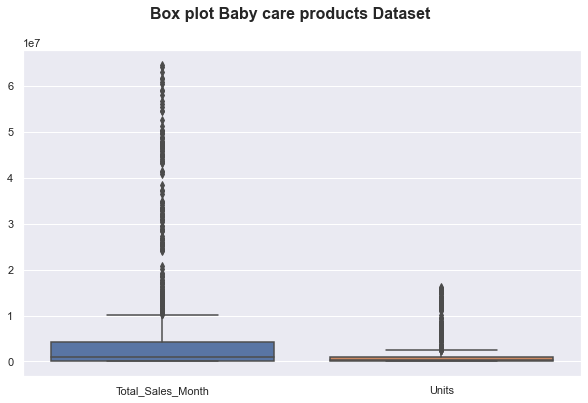

In [78]:
plt.figure(figsize =(10,6))
sns.boxplot(data = df1)

plt.suptitle('Box plot Baby care products Dataset ',fontsize= 16, fontweight='bold')
plt.show()

**Observation 6 :**

* Their are outliers in the dataset but we aren't going to cap these outliers right now.


### Step 4 - Univariate analysis, Bivariate Analysis and Multivariate Analysis

### Univariate analysis (Catagorical)

#### Category

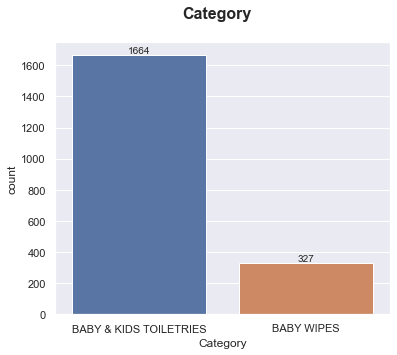

In [79]:
plt.figure(figsize = (6,5))

gen = sns.countplot(df1['Category'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Category',fontsize= 16, fontweight='bold')
plt.show()

#### Sub_Category

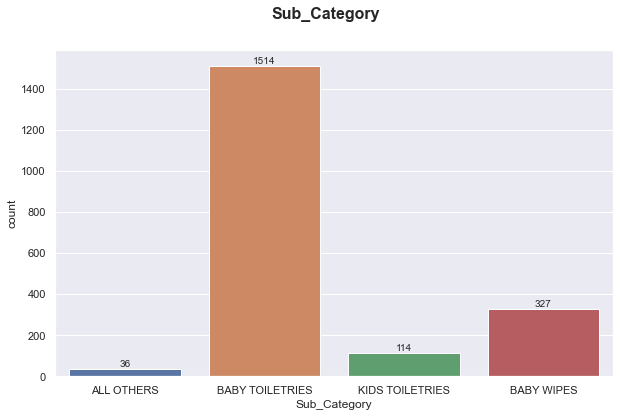

In [80]:
plt.figure(figsize = (10,6))

gen = sns.countplot(df1['Sub_Category'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Sub_Category',fontsize= 16, fontweight='bold')
plt.show()

In [81]:
df1.Sub_Category.unique()

array(['ALL OTHERS', 'BABY TOILETRIES', 'KIDS TOILETRIES', 'BABY WIPES'],
      dtype=object)

**Observation 6 :**

**BABY TOILETRIES (1514)** is the 1st Highest which tell that it been most consumned product in the market.

**BABY WIPES (327)** is the 2nd Highest.

**KIDS TOILETRIES (114)** is the 3rd Highest.

**ALL OTHERS (36)** is the last.

#### Segment

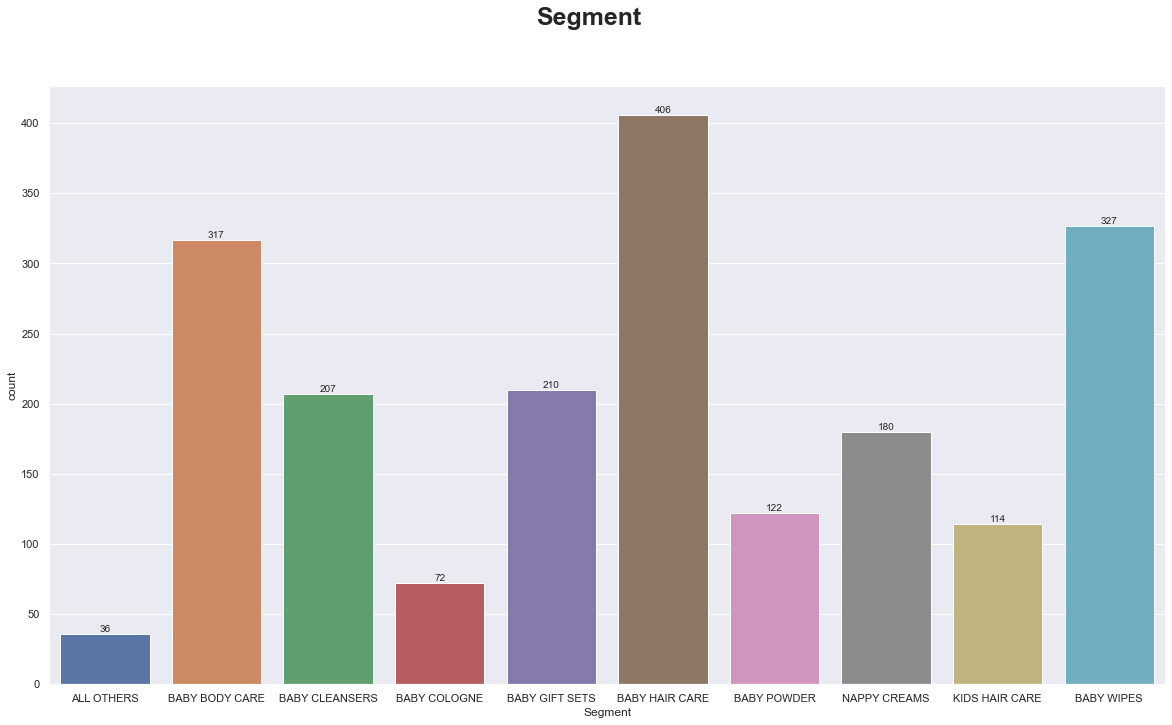

In [82]:
plt.figure(figsize = (20,11))

gen = sns.countplot(df1['Segment'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Segment',fontsize= 25, fontweight='bold')
plt.show()

In [83]:
df1.Segment.unique()

array(['ALL OTHERS', 'BABY BODY CARE', 'BABY CLEANSERS', 'BABY COLOGNE',
       'BABY GIFT SETS', 'BABY HAIR CARE', 'BABY POWDER', 'NAPPY CREAMS',
       'KIDS HAIR CARE', 'BABY WIPES'], dtype=object)

**Observation 7 :**

* **BABY HAIR CARE (406)** segment has most consumers followed by BABY WIPES (327) and BABY BODY CARE (317)

#### Sub_Segment

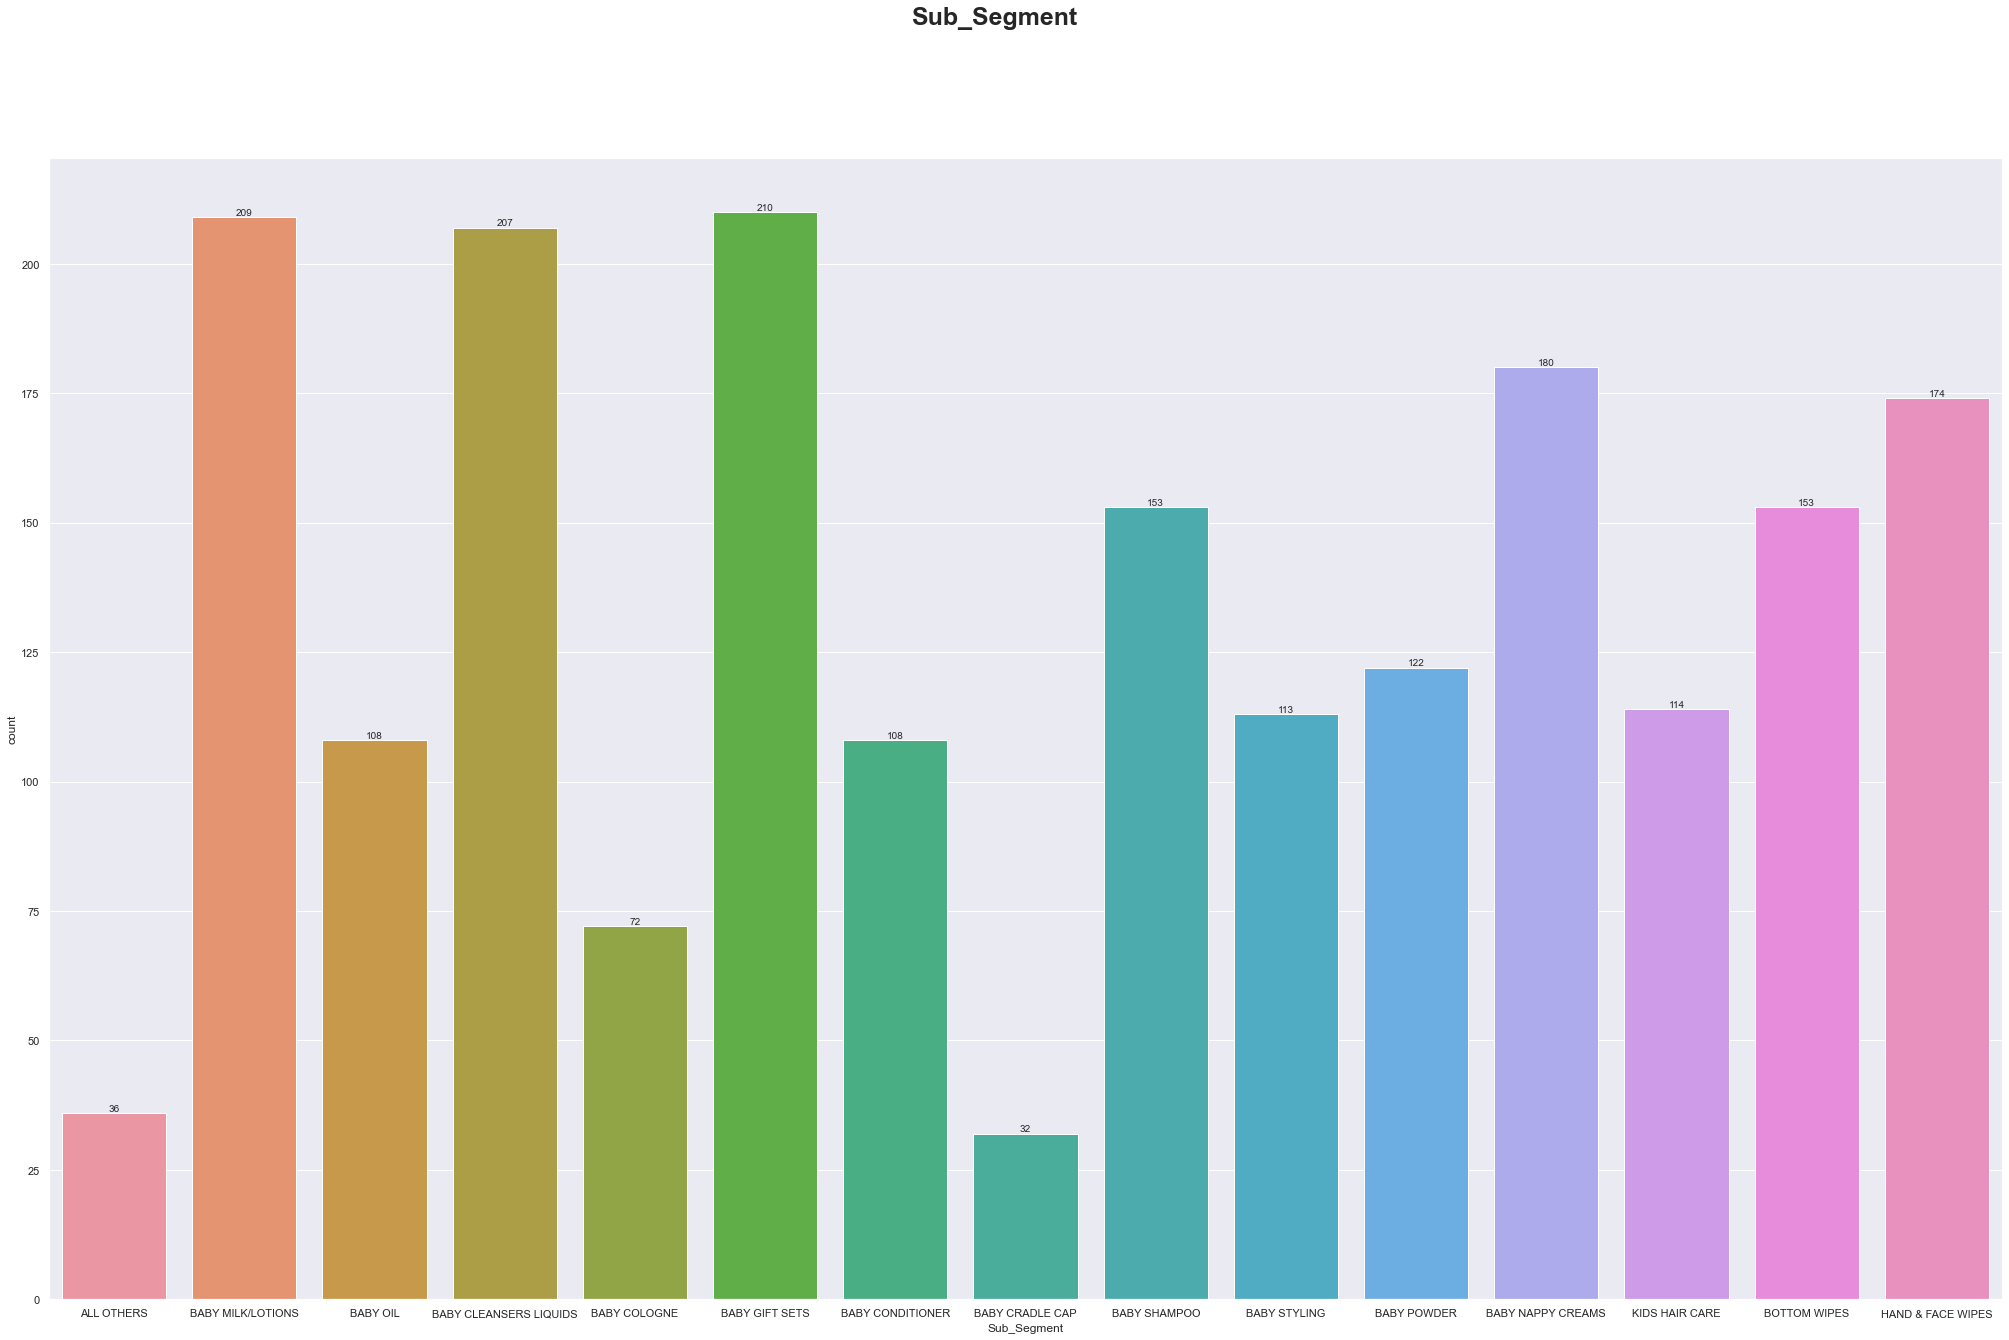

In [84]:
plt.figure(figsize = (35,21))

gen = sns.countplot(df1['Sub_Segment'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Sub_Segment',fontsize= 25, fontweight='bold')
plt.show()

In [85]:
df1.Sub_Segment.value_counts()

BABY GIFT SETS            210
BABY MILK/LOTIONS         209
BABY CLEANSERS LIQUIDS    207
BABY NAPPY CREAMS         180
HAND & FACE WIPES         174
BABY SHAMPOO              153
BOTTOM WIPES              153
BABY POWDER               122
KIDS HAIR CARE            114
BABY STYLING              113
BABY OIL                  108
BABY CONDITIONER          108
BABY COLOGNE               72
ALL OTHERS                 36
BABY CRADLE CAP            32
Name: Sub_Segment, dtype: int64

**Observation 8 :**

**BABY GIFT SETS (210), BABY MILK/LOTIONS (209) and BABY CLEANSERS LIQUIDS (207)** are the top 3

#### Manufacturer_New

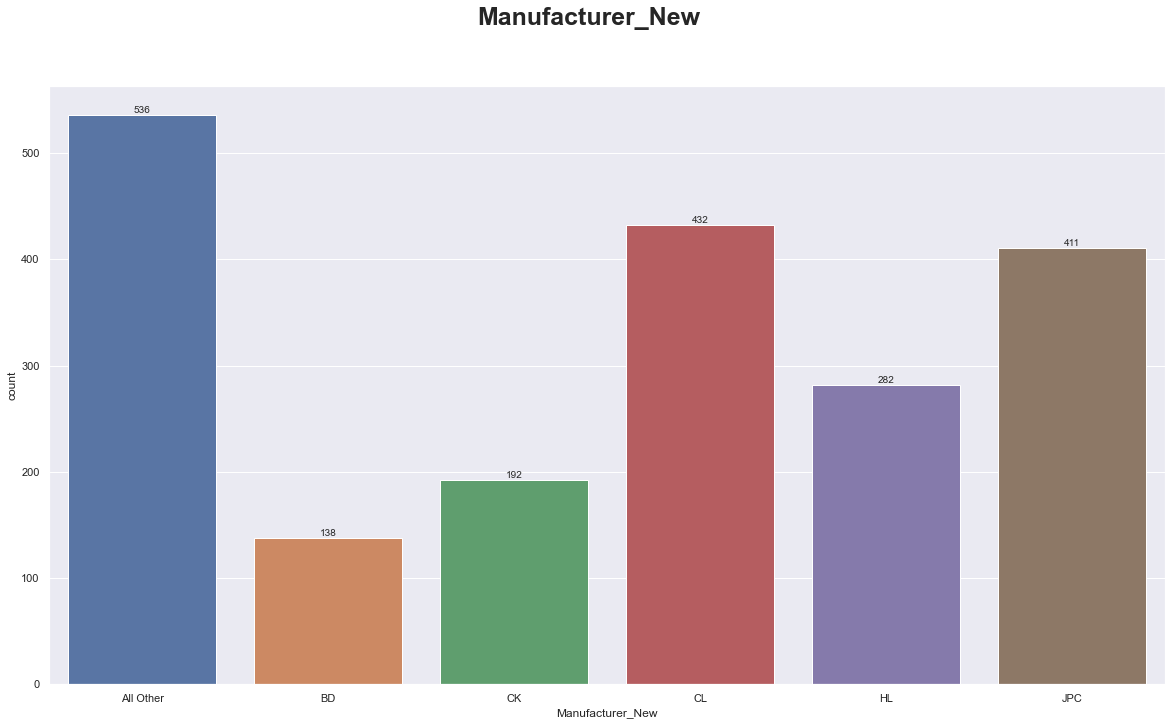

In [86]:
plt.figure(figsize = (20,11))

gen = sns.countplot(df1['Manufacturer_New'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Manufacturer_New',fontsize= 25, fontweight='bold')
plt.show()

In [87]:
df1.Manufacturer_New.value_counts()

All Other    536
CL           432
JPC          411
HL           282
CK           192
BD           138
Name: Manufacturer_New, dtype: int64

**Observation 8 :**

**All Other, CL and JPC** are the top 3 Manufacturers 

### Univariate analysis (Numerical)

#### Total_Sales_Month

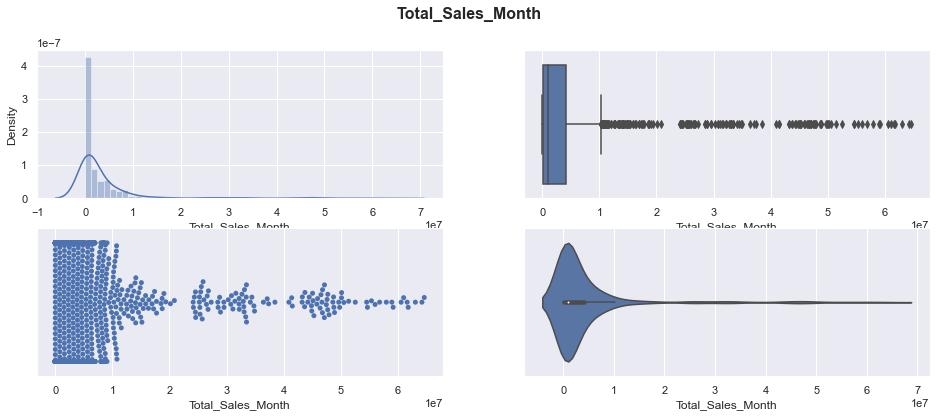

In [88]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['Total_Sales_Month'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['Total_Sales_Month'], ax=ax[0][1])
sns.swarmplot(df1['Total_Sales_Month'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['Total_Sales_Month'], ax=ax[1][1])

plt.suptitle('Total_Sales_Month',fontsize= 16, fontweight='bold')
plt.show()

#### Units

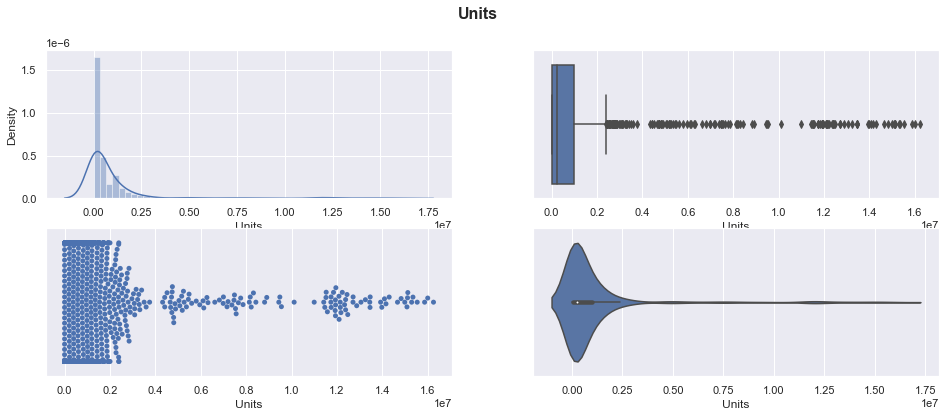

In [89]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['Units'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['Units'], ax=ax[0][1])
sns.swarmplot(df1['Units'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['Units'], ax=ax[1][1])

plt.suptitle('Units',fontsize= 16, fontweight='bold')
plt.show()

### Multi-Variate Analysis

<Figure size 1440x1080 with 0 Axes>

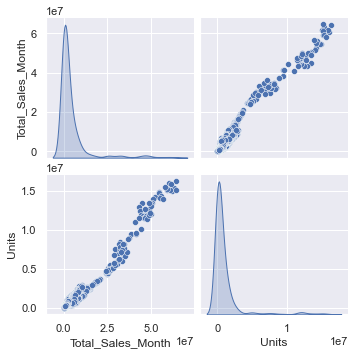

In [176]:
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.pairplot(df1,diag_kind='kde')

## Units vs Manufacturer_New

<AxesSubplot:xlabel='Manufacturer_New', ylabel='Units'>

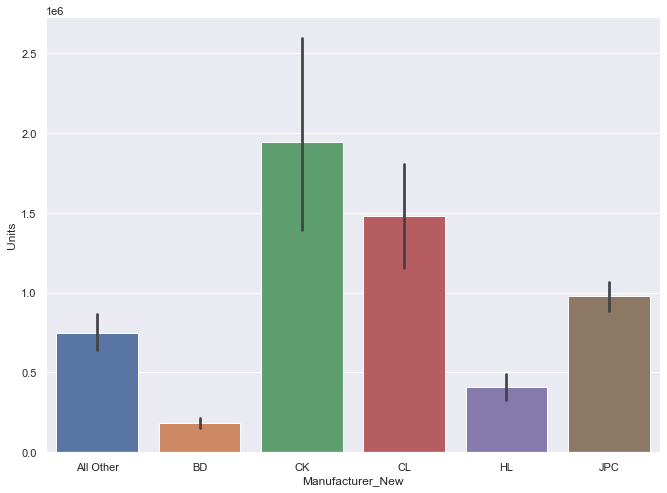

In [177]:
sns.barplot(y = df1['Units'],x = df1['Manufacturer_New'])

**Observation 9:**

* Highest Manufacturer of the Baby care products is **CK**

In [124]:
df_DateTime.columns

Index(['Category', 'Sub_Category', 'Segment', 'Sub_Segment',
       'Manufacturer_New', 'Total_Sales_Month', 'Units', 'Year', 'Month'],
      dtype='object')

## DateTime Analysis

We Know that the Date column is the correct data type, let’s set it as the DataFrame’s index.

In [132]:
df_DateTime = df1.copy()

In [133]:
df_DateTime = df_DateTime.set_index("Actual_Month")
df_DateTime.head(3)

,Category,Sub_Category,Segment,Sub_Segment,Manufacturer_New,Total_Sales_Month,Units
Actual_Month,,,,,,,
2016-11-01,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,890597.6,170520.0
2016-12-01,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,4933059.2,993499.2
2017-01-01,BABY & KIDS TOILETRIES,ALL OTHERS,ALL OTHERS,ALL OTHERS,All Other,3648185.6,687198.4


In [134]:
# Add columns with year, month, and weekday name
df_DateTime['Year'] = df_DateTime.index.year
df_DateTime['Month'] = df_DateTime.index.month

# Display a random sampling of 5 rows
df_DateTime.sample(5, random_state=0)

,Category,Sub_Category,Segment,Sub_Segment,Manufacturer_New,Total_Sales_Month,Units,Year,Month
Actual_Month,,,,,,,,,
2018-07-01,BABY & KIDS TOILETRIES,BABY TOILETRIES,BABY POWDER,BABY POWDER,CK,0.0,0.0,2018,7
2017-11-01,BABY & KIDS TOILETRIES,BABY TOILETRIES,BABY POWDER,BABY POWDER,CL,1787656.0,857238.4,2017,11
2017-09-01,BABY & KIDS TOILETRIES,BABY TOILETRIES,BABY HAIR CARE,BABY CRADLE CAP,All Other,1.6,1.6,2017,9
2019-10-01,BABY & KIDS TOILETRIES,BABY TOILETRIES,BABY BODY CARE,BABY MILK/LOTIONS,BD,840004.0,103645.6,2019,10
2017-05-01,BABY & KIDS TOILETRIES,KIDS TOILETRIES,KIDS HAIR CARE,KIDS HAIR CARE,All Other,4734336.0,1300296.0,2017,5


In [139]:
df_DateTime.Segment.value_counts()

BABY HAIR CARE    406
BABY WIPES        327
BABY BODY CARE    317
BABY GIFT SETS    210
BABY CLEANSERS    207
NAPPY CREAMS      180
BABY POWDER       122
KIDS HAIR CARE    114
BABY COLOGNE       72
ALL OTHERS         36
Name: Segment, dtype: int64

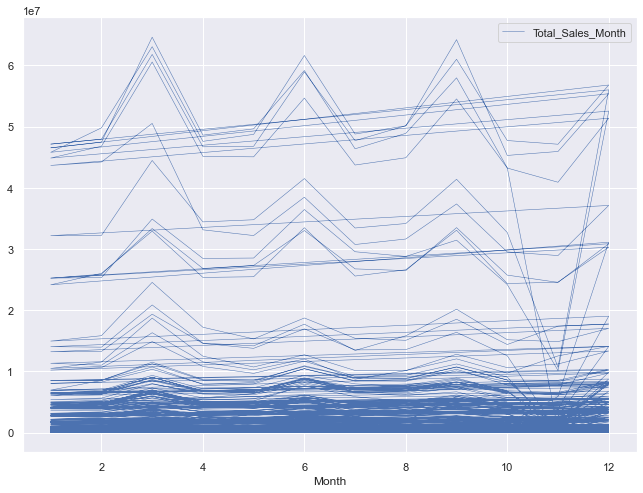

In [150]:
sns.set(rc={'figure.figsize':(11, 8)})
df_DateTime.plot(x= "Month" ,y = "Total_Sales_Month", linewidth=0.5);

**Observation 10:**


* We can clearly see the **sales peak Months** from the dataset those are **March(3), June(6), September (9)**

### Category Vs Year DateTime Analysis

<AxesSubplot:xlabel='Category', ylabel='count'>

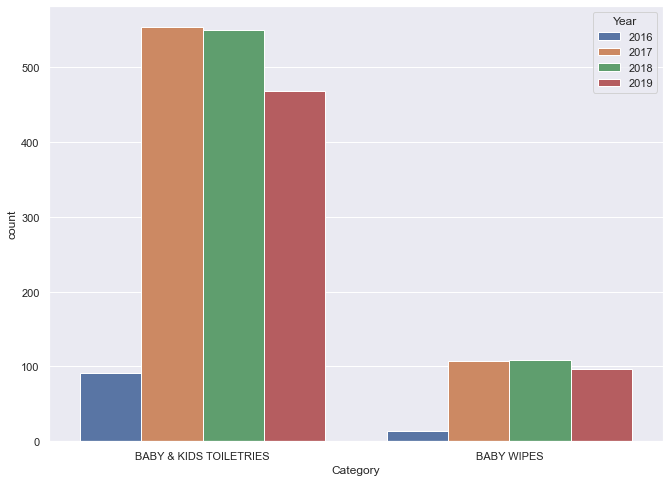

In [153]:
sns.countplot(data=df_DateTime,hue='Year', x='Category')

**Observation 11:**

* In Category **BABY & KIDS TOILETRIES** have to Highest counts

* Year **2017 and 2018 has seen the most HIGHEST sales** for both BABY & KIDS TOILETRIES and BABY WIPES

### Year VS Segment Datatime Analysis 

<AxesSubplot:xlabel='Segment', ylabel='count'>

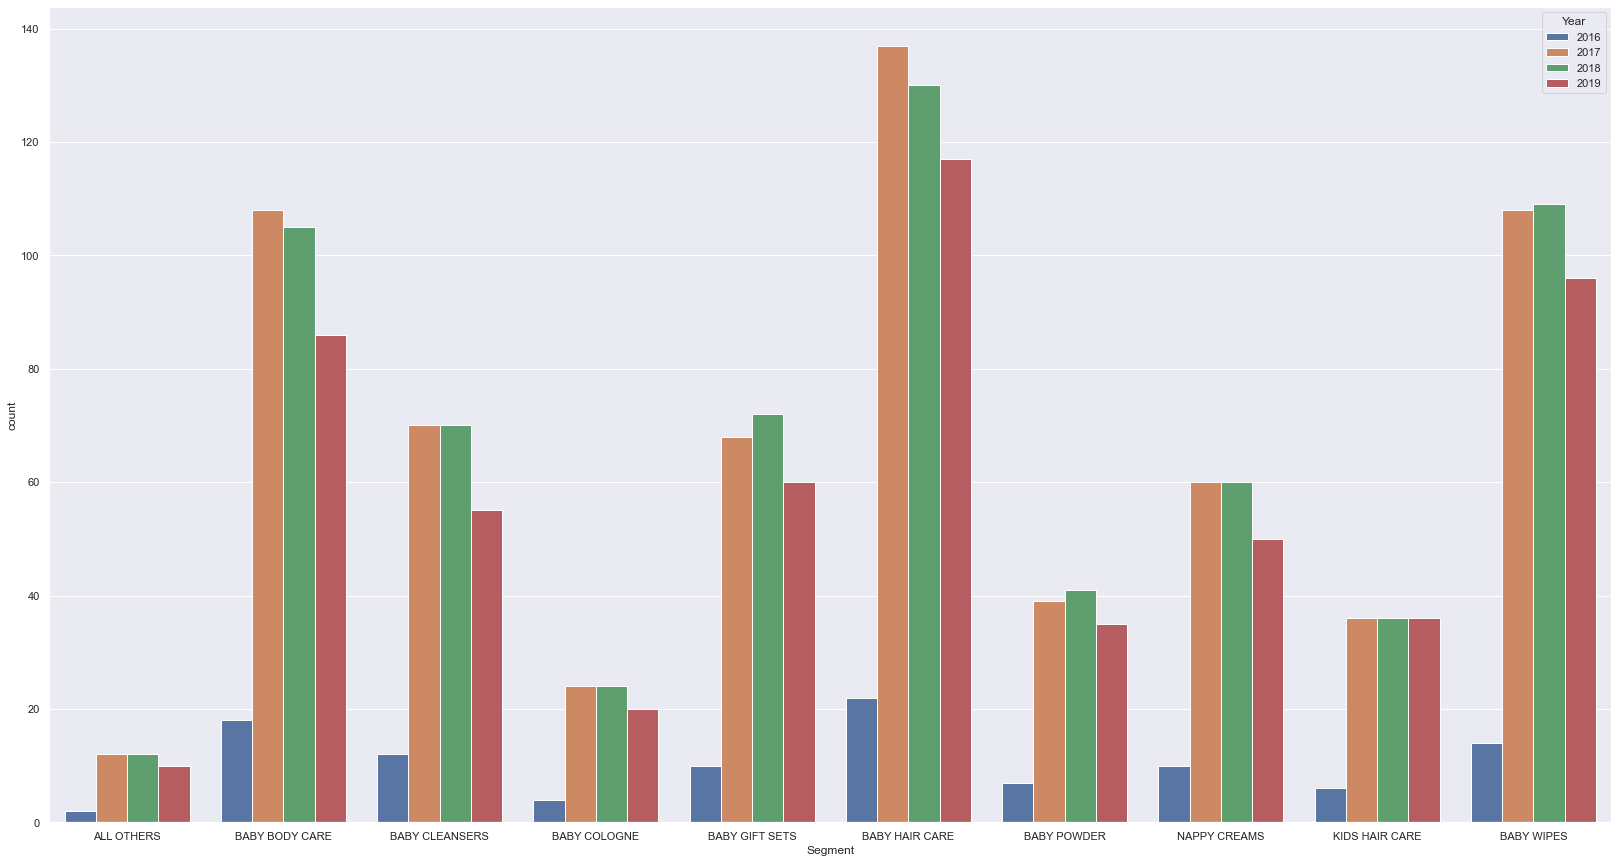

In [155]:
plt.figure(figsize=(28,15))
sns.countplot(data=df_DateTime,hue='Year', x='Segment')

**Observation 12 :**

* As we can see even for every **segment 2017 and 2018 shows the HIGHEST sales.**

* We could clearly see that **BABY HAIR CARE** has the highest sales followed by BABY WIPES and BABY BODY CARE.

* In **KIDS HAIR CARE** for the year 2017,2018 and 2019 it shows same sales 

<AxesSubplot:xlabel='Total_Sales_Month', ylabel='Units'>

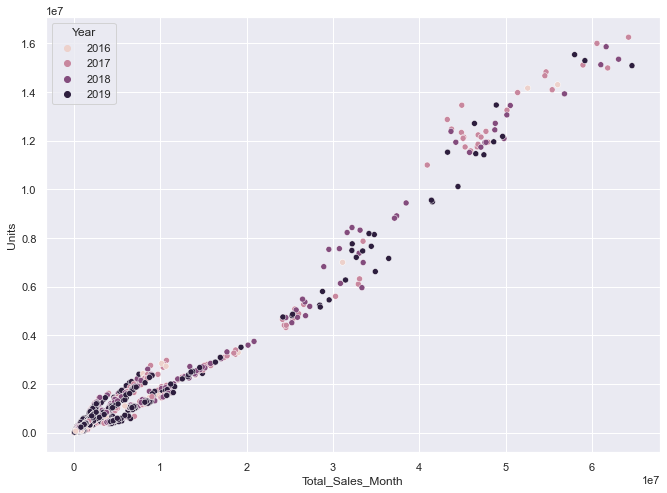

In [175]:
sns.scatterplot(x='Total_Sales_Month',y = 'Units',hue='Year',data=df_DateTime)